<h6>Fall 2021 - CPSC 483-02<br>
Project 2 - <br>
Sean Javiya <br>
Jake Wong <br>
</h6>
In Project 1 - Anomaly Detection, we were given a dataset containing a list of students and their Zoom attendance over a 5 week course.<br>We performed various statistical tests on the data, in order to develop a function that will parse the provided dataset and output a list of students who were tardy or under-attended.<br>We developed two functions using different statistical methods of detecting anomalies in the dataset.<br>We conducted an analysis on the results and determined which function was more appropriate for the given dataset.
^rewrite

In [225]:
#import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

headers = []
values = []

#with open('dataset.csv') as csv_data:
#    data_stream = csv.reader(csv_data, delimiter=',')
#    headers = next(data_stream)

xvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=(0,1))
yvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=2)
#print(yvalues[800])
randomnumber = np.random.randint(0, yvalues.size, size= int(yvalues.size/10))
#print (randomnumber.size)
print (yvalues.size)
#print (randomnumber)
xtrain = xvalues
ytrain = yvalues
#print(xtrain[0])
xtest1 = [] #10%
xtest2 = []
ytest = [] #10%
randomnumber[::-1].sort()
for n in randomnumber:
    xtest1.append(xvalues[n, 0])
    xtest2.append(xvalues[n, 1])
    ytest.append(yvalues[n])
    xtrain = np.delete(xtrain, n, 0)
    ytrain = np.delete(ytrain, n, 0)
xtest = np.stack((xtest1, xtest2), axis= -1)
ytest = np.asarray(ytest)
#print(randomnumber[0])
print (ytrain.size)
print (ytest.size)
#print (xtrain)

1000
900
100


In [226]:
#plt.plot(xtest[:,0], ytest, 'ro')
#plt.plot(xtest[:,1], ytest, 'ro')
#print (xvalues[0])
#print (xtrain)
#print (xvalues[994])
#print (xtest[0])
Xtrain = np.hstack((np.ones_like(xtrain), xtrain))
Xtrain = np.delete(Xtrain, 0, 1)
print (Xtrain)
weights = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(ytrain)
print (weights)


[[ 1.         -1.74575782 -1.41239652]
 [ 1.         -1.16639696 -0.06900688]
 [ 1.         -0.86156208 -1.6482701 ]
 ...
 [ 1.          0.16524725 -1.4451267 ]
 [ 1.          0.60744114 -2.60559204]
 [ 1.          0.04306784 -3.45458992]]
[0.62540293 0.08449543 0.00846975]


y = b + mx
y = w0 x1 + w1 x2
given x1 x2 and y
y = (w0 w1) dotproduct (x1 x2)
y dotproduct inverse of transpose of (x1 x2) = (w0 w1)

y = weights dot xtrain

In [227]:

predicteddata = []
predictrange = ytrain.size
predictrange -= 1
#print (predictrange)
while predictrange >= 0:
    prediction = weights[0] * Xtrain[predictrange,0] + weights[1] * Xtrain[predictrange, 1] + weights[2] * Xtrain[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    #print(xtrain[n])
#print(predicteddata)
predicteddata[::-1].sort()
#print(len(predicteddata))
predictrange = ytrain.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytrain[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytrain.size
print (squaredloss)
#plt.plot(weights, ytrain, 'ro')

8.580322765358575


In [228]:
#predictrange = ytrain.size - 1
#n = 0
#ones = []
#while n <= predictrange:
#    ones.append(1)
#    n += 1
#ones = np.asarray(ones)
#ones.reshape(ytrain.size, 1)
#print (ones.shape)
#print (xtrain.shape)
#Xquadratic = np.stack((ones, xtrain), axis = -1)
#print (Xquadratic)
#Xquadratic = np.concatenate((np.ones_like(ytrain), xtrain), axis= -1)

Xquadratic = np.hstack((np.ones_like(xtrain), xtrain, xtrain**2))
#Xquadratic = np.hstack(ones_like(Xquadratic), Xquadratic)
#Xquadratic = np.hstack((np.ones_like(xtrain), xtrain))
Xquadratic = np.delete(Xquadratic, 0, 1)
#print(Xquadratic)
quadweights = np.linalg.inv(Xquadratic.transpose().dot(Xquadratic)).dot(Xquadratic.transpose()).dot(ytrain)
print(quadweights)
  #plt.plot((Xquadratic.transpose().dot(xtrain)), ytrain, 'ro')
quadpredicteddata = []
predictrange = ytrain.size
predictrange -= 1
  #print (predictrange)
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadratic[predictrange, 0] + quadweights[1] * Xquadratic[predictrange, 1] + quadweights[2] *Xquadratic[predictrange, 2] + quadweights[3] * Xquadratic[predictrange, 3] + quadweights[4] * Xquadratic[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
      #print(xtrain[n])
  #print(predicteddata)
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytrain[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytrain.size
print (squaredloss)
#plt.plot(predicteddata, ytrain, 'b')


[0.52139562 0.08288432 0.01052376 0.03077441 0.00587886]
8.576101742087577


equation is w0* 1 + w1 x1 + w2x2 + w3 x1^2 + w4 x2^2

In [229]:
#print (xtest)
#print (ytest)
Xtest = np.hstack((np.ones_like(xtest), xtest))
Xtest = np.delete(Xtest, 0, 1)
predicteddata = []
predictrange = ytest.size
predictrange -= 1
#print (predictrange)
while predictrange >= 0:
    prediction = weights[0] * Xtest[predictrange,0] + weights[1] * Xtest[predictrange, 1] + weights[2] * Xtest[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    #print(xtrain[n])
#print(predicteddata)
predicteddata[::-1].sort()
#print(len(predicteddata))
predictrange = ytest.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytest[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytest.size
print (squaredloss)

8.57498588629352


In [230]:
Xquadtest = np.hstack((np.ones_like(xtest), xtest, xtest**2))
#Xquadratic = np.hstack(ones_like(Xquadratic), Xquadratic)
#Xquadratic = np.hstack((np.ones_like(xtrain), xtrain))
Xquadtest = np.delete(Xquadtest, 0, 1)
#print(Xquadtest)

quadpredicteddata = []
predictrange = ytest.size
predictrange -= 1
  #print (predictrange)
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadtest[predictrange, 0] + quadweights[1] * Xquadtest[predictrange, 1] + quadweights[2] * Xquadtest[predictrange, 2] + quadweights[3] * Xquadtest[predictrange, 3] + quadweights[4] * Xquadtest[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
      #print(xtrain[n])
  #print(predicteddata)
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytest[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytest.size
print (squaredloss)


8.480779434041326


about the same

8.765276597921535


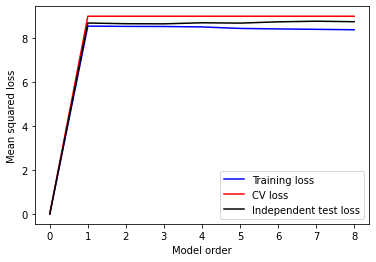

In [243]:
max_order = 8
K = 5
cv_loss = np.zeros((K,max_order+1))
ind_loss = np.zeros((K,max_order+1))
train_loss = np.zeros((K,max_order+1))
x_train = xtrain
x_ktest = xtest 

for k in range(max_order+1)[1:]:
    for fold in range(K):
        y_fold = ytrain[fold*180 : (fold+1)*180]
        y_train = np.delete(ytrain, (range(fold*180, (fold+1)*180)))
        
        X_fold = x_train[fold*180 : (fold+1)*180, : ]
        X_fold = np.hstack((np.ones_like(y_fold)[:, np.newaxis], X_fold))
        
        X_train = np.delete(x_train, (range(fold*180, (fold+1)*180)), 0)
        X_train = np.hstack((np.ones_like(y_train)[:, np.newaxis], X_train))
        
        x_test = np.hstack((np.ones_like(ytest)[:, np.newaxis], x_ktest))
        
        wfold = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,y_train))
        
        ind_pred = np.dot(x_test,wfold)
        foldpred = np.dot(X_fold,wfold)
        train_pred = np.dot(X_train,wfold)
        
        cv_loss[fold,k] = ((fold_pred - y_fold)**2).mean()
        ind_loss[fold,k] = ((ind_pred - ytest)**2).mean()
        train_loss[fold,k] = ((train_pred - y_train)**2).mean()  
        
    x_train = np.hstack((x_train,xtrain**(k+1)))
    x_ktest = np.hstack((x_ktest,xtest**(k+1)))    

order = np.arange(max_order+1)
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')


around 7, it starts to overfit
(1, x1, x2, ... x1^7, x2^7) dot product with wfold


In [244]:
print(ind_loss[:,7].mean())

8.765276597921535


is the test MSE for polynomial order 7

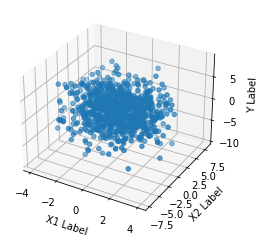

In [248]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(xtrain[:,0], xtrain[:,1], ytrain)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()

I notice that it looks pretty
